In [56]:
import os
from os.path import splitext, basename

import pandas as pd
import numpy as np
from matplotlib.figure import Figure
%matplotlib

Using matplotlib backend: QtAgg


# Terra Setup

In [ ]:
BILLING_PROJECT_ID = os.environ['WORKSPACE_NAMESPACE']
WORKSPACE = os.environ['WORKSPACE_NAME']
bucket = os.environ['WORKSPACE_BUCKET']

In [ ]:
submission = '2e240765-f806-49fe-9b21-1de5c9852b5f'
bucket_location = f'{bucket}/{submission}/DepthOfCoverage'

In [ ]:
targets = []
objects1 = !gsutil ls $bucket_location
for obj1 in objects1.split('\n'):
    objects2 = !dir $obj1/call-depthOfCoverage
    gene_stats = [obj2 for obj2 in objects2 if obj2.endswith("gene_statistics")]
    if not gene_stats: continue
    targets.append(gene_stats[0])

print(f'Found {len(targets)} gene_statistics file among submissions.')

# Local set up

In [61]:
targets = [f'outputs/{obj}' for obj in os.listdir('outputs') if obj.endswith('gene_statistics')]
targets

['outputs/PR-09-2767-Normal.sample_gene_statistics']

# Analysis

In [62]:
def plot_gene_stats(file):
    sample_id = splitext(basename(file))[0]

    inp = np.loadtxt(file,skiprows=1,usecols=range(1,502),delimiter=",")
    rank = inp/inp[0]

    fig = Figure()
    ax = fig.subplots()

    mark=np.array([20,50,100,150])

    ax.bar(range(501), rank, 1)
    ax.hlines(rank[mark+1],0,mark,colors=['#ff7f00'])
    ax.vlines(mark,0,rank[mark+1],colors=['#ff7f00'])
    for m in mark:
        ax.text(m,rank[m+1],f'{rank[m+1]*100:.2f}% >= {m}x',ha='left', va='bottom')
    ax.set(xlabel='Surpassed Depth',
        xlim=(0,500),
        ylabel='# Genes Covered',
        title=f'{sample_id}')

    display(fig)

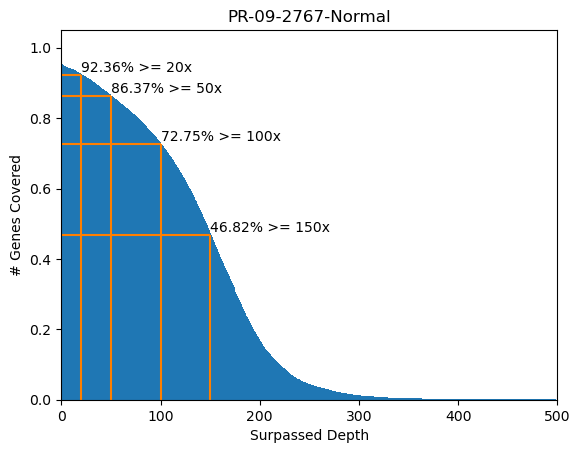

In [63]:
for stats in targets:
    plot_gene_stats(stats)